In [1]:
%pylab inline
import numpy as np
import scipy
from scipy import signal
import os
import csv
from my_logger import log_progress

matplotlib.rcParams['savefig.dpi'] = 120
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': u'--'})

sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy')
sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy/libbootstrap')

import libbootstrap.spectralmodel as spectralmodel
import scipy
import libbootstrap.spectra_generator as spectra_generator

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from libs.models import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
sitelist = ['ARM', 'BLA', 'HEA', 'KIN', 'MAY', 'NAR', 'NIL', 'RON', 'STJ', 'SUC']

from matplotlib.patches import Ellipse

def error_ellipse_plot(x_data, y_data,
                       nstd=2,
                       plotcolour='b',
                       size = 3,
                       _xlabel = '$b_{bp}(550)(m^{-1})$',
                       _ylabel = '$a_\phi(440)(m^{-1})$', 
                       plot_label=''):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    x = x_data
    y = y_data

    nstd = nstd
    ax = plt.subplot(111)

    #cov = np.cov(data[2][:,0],data[2][:,1])
    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.median(x), np.median(y)),
                  width=w, height=h,
                  angle=theta,
                  color='black',
                  linestyle='dashed',
                  linewidth=2)

    ell.set_facecolor('gray')
    ell.set_edgecolor('black')
    ell.set_alpha(0.2)
    ax.add_artist(ell)
    
    plt.scatter(x, y, color=plotcolour, alpha=0.6, s=size, label=plot_label)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    
    #.set_axis_labels('$a_\phi(440)(m^{-1})$', '$a_g(400)(m^{-1})$')
    plt.legend(frameon=True, fancybox=True, shadow=True)
    return plt


[[  2.58576277e-03   2.27774643e-03   2.35057508e-03 ...,   2.40601378e-04
    2.38013550e-04   2.05614427e-04]
 [  2.46343751e-03   2.14212045e-03   2.28130057e-03 ...,   2.04641712e-04
    2.12779956e-04   1.85760744e-04]
 [  1.92023714e-03   1.58960308e-03   1.68683963e-03 ...,   1.69782770e-04
    1.57927874e-04   1.44652857e-04]
 ..., 
 [  1.25574296e-03   8.89910293e-04   1.03324577e-03 ...,   6.71346127e-05
    6.45927593e-05   7.05849998e-05]
 [  3.80503237e-03   3.53209259e-03   3.66061159e-03 ...,   4.10588392e-04
    4.01171268e-04   3.19937882e-04]
 [  3.30321006e-03   3.01914576e-03   3.15671795e-03 ...,   3.37568746e-04
    3.34669130e-04   2.70984586e-04]]
ARM


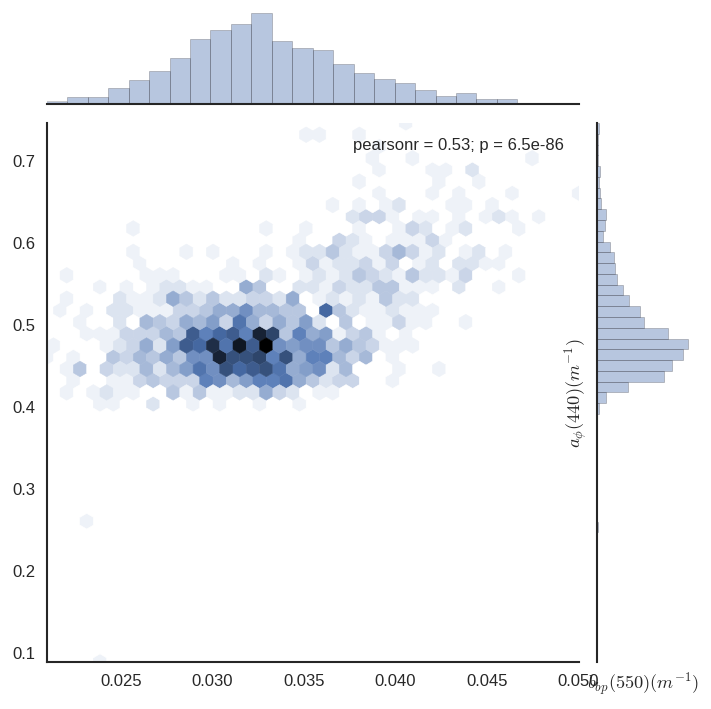

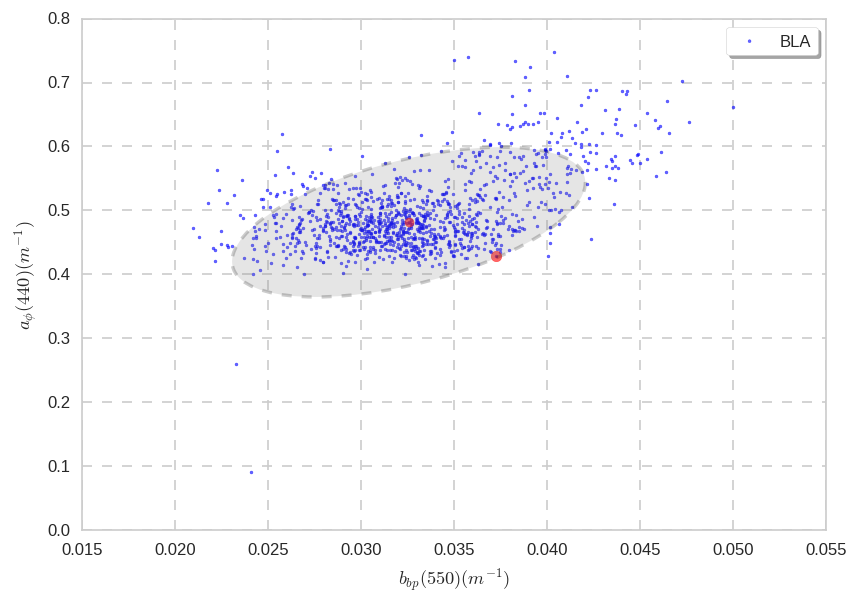

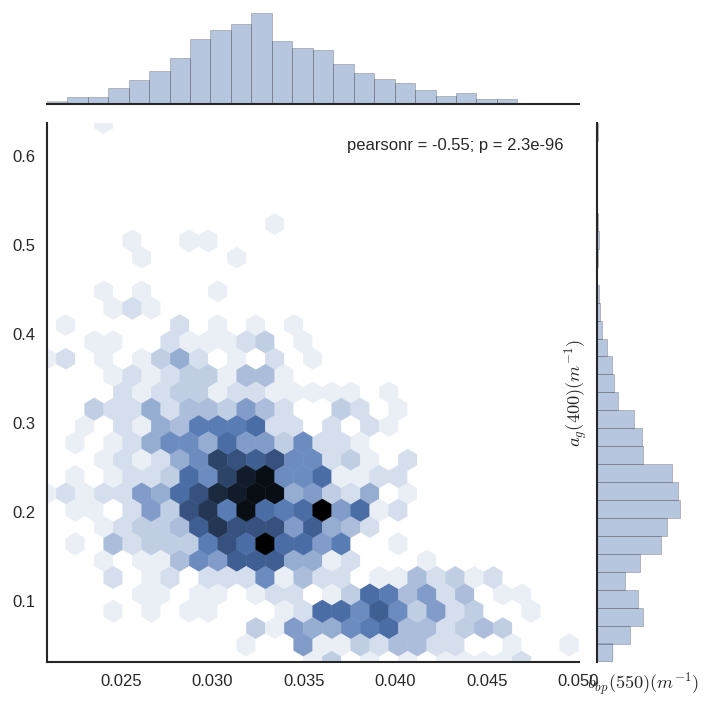

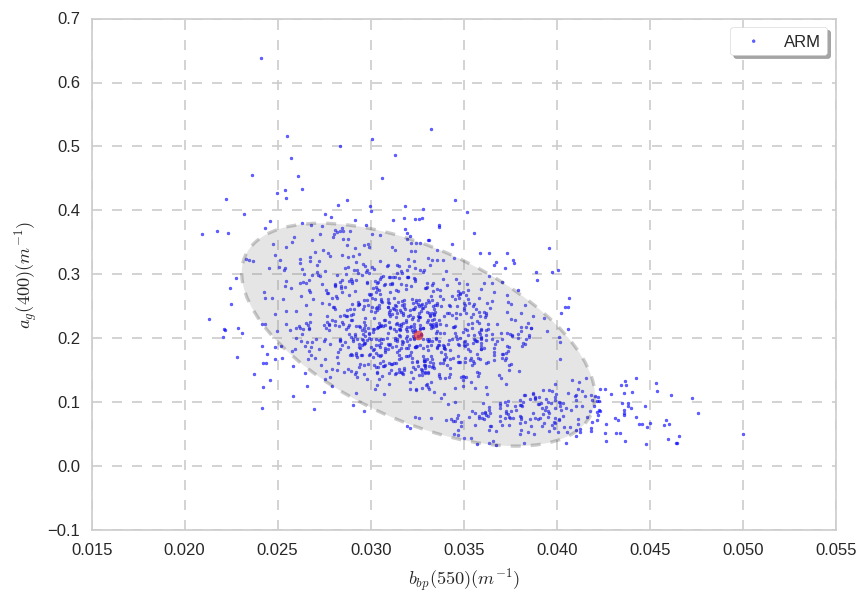

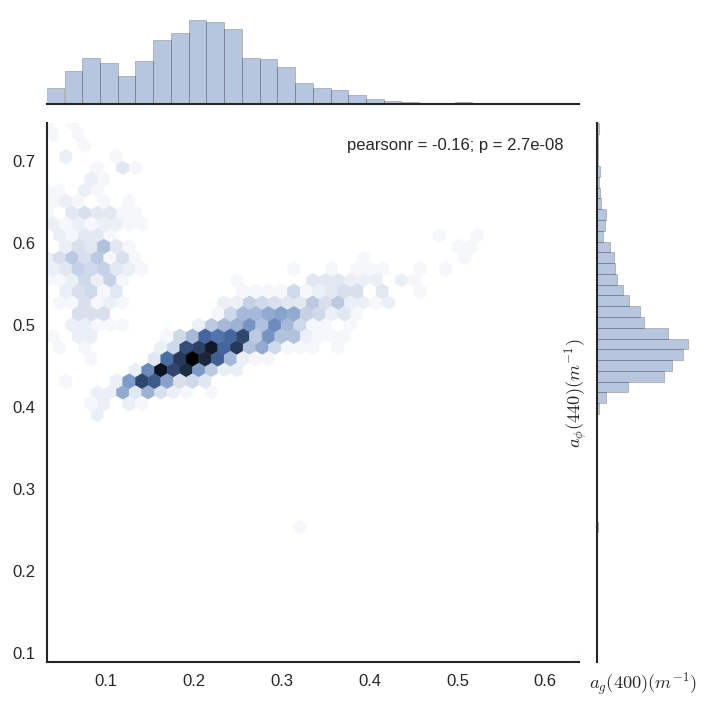

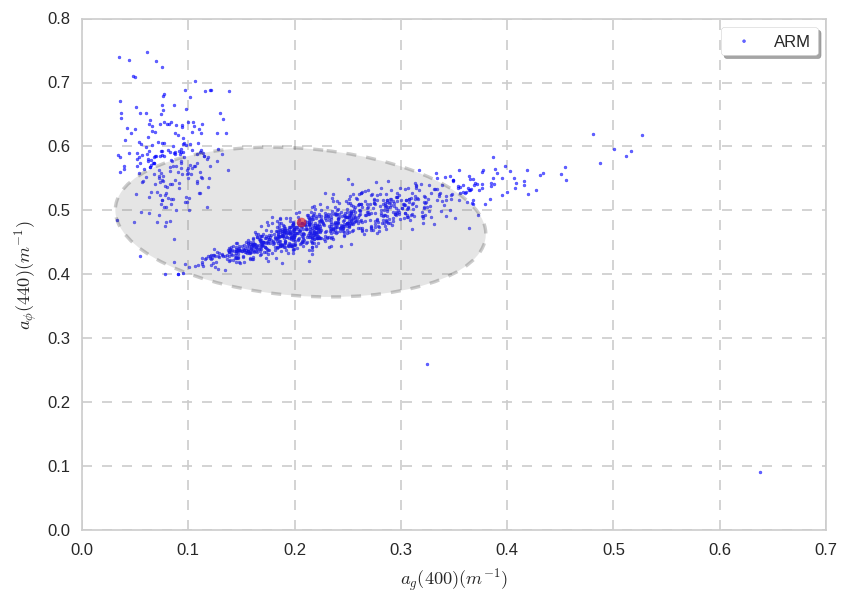

NameError: name 'tax' is not defined

In [21]:
wavelengths = np.genfromtxt("./inputs/swan_data/0_ARM_14Nov11_1212.csv", delimiter=',')[0, :]

for sitename in sitelist:

    # open the data file and invert the data
    dc = HopeDeep(wavelengths);
    dc.rrs = np.genfromtxt("./inputs/rrs_files/" + sitename + "synthRrs.csv", delimiter=',')
    #dc.rrs = np.genfromtxt("./inputs/swan_data/0_" + sitename + "_14Nov11_1212.csv", delimiter=',')
    dc.read_all_iops_from_files();

    synth_data = dc.run(num_iters=1);

    ###interact(__plot_inverted,rrs_num=(1, len(synth_data)))

    a = []
    b = []
    c = []

    print(sitename)

    for i_iter in range(0, len(synth_data)):
        a.append(synth_data[i_iter].x[0]) #phi)
        b.append(synth_data[i_iter].x[1]) #bbp)
        c.append(synth_data[i_iter].x[2]) #cdom

    a = np.asarray(a)
    b = np.asarray(b)
    c = np.asarray(c)
    
    # Filter out the divergent iops
    a_idx = a>0.02
    a = a[a_idx]
    b = b[a_idx]
    c = c[a_idx]
    
    b_idx = b>0.02
    a = a[b_idx]
    b = b[b_idx]
    c = c[b_idx]
    
    c_idx = c>0.02
    a = a[c_idx]
    b = b[c_idx]
    c = c[c_idx]

    # bbp v aphi

    with sns.axes_style("white"):
        sns.jointplot(b, a,  kind="hex");
        #sns.jointplot(np.median(b), np.median(a), kind="hex") # cant do this :-/

    sns.axlabel('$b_{bp}(550)(m^{-1})$', '$a_\phi(440)(m^{-1})$')
    plt.hold(True)
    pylab.savefig('./outputs/' + sitename + '_bbp_aphi_hex_error.png')
    
    pylab.show()


    for i_iter in range(0,200):#enumerate(a):
        pylab.clf()
        error_ellipse_plot(b, a, plot_label='BLA', _xlabel='$b_{bp}(550)(m^{-1})$', _ylabel='$a_\phi(440)(m^{-1})$')
        error_ellipse_plot(b[i_iter], a[i_iter], plotcolour='r', size=40, _xlabel='$b_{bp}(550)(m^{-1})$', _ylabel='$a_\phi(440)(m^{-1})$')
        #pylab.plot(b[i_iter], a[i_iter], color='g', size=30)

        pylab.savefig('./outputs/' + str(i_iter) + sitename +  '_bbp_aphi_ellip_error.png')
        
    error_ellipse_plot(np.median(b), np.median(a), plotcolour='r', size=30, _xlabel='$b_{bp}(550)(m^{-1})$', _ylabel='$a_\phi(440)(m^{-1})$')
    #error_ellipse_plot(measured_av['BLA'][1], measured_av['BLA'][0], plotcolour='g', size=9)
    #plt.axes().set_aspect('equal')
    pylab.savefig('./outputs/' + sitename + '_bbp_aphi_ellip_error.png')
    pylab.show()
    


    # bbp vs cdom

    with sns.axes_style("white"):
        sns.jointplot(b, c,  kind="hex");

    sns.axlabel('$b_{bp}(550)(m^{-1})$', '$a_g(400)(m^{-1})$')
    plt.hold(True)
    pylab.savefig('./outputs/' + sitename + '_bbp_ag_hex_error.png')
    pylab.show()

    error_ellipse_plot(b, c, plot_label=sitename, _xlabel='$b_{bp}(550)(m^{-1})$', _ylabel='$a_g(400(m^{-1}))$')
    error_ellipse_plot(np.median(b), np.median(c), plotcolour='r', size=30, _xlabel='$b_{bp}(550)(m^{-1})$', _ylabel='$a_g(400)(m^{-1})$')
    #error_ellipse_plot(measured_av['BLA'][1], measured_av['BLA'][2], plotcolour='g', size=9)
    #plt.axes().set_aspect('equal')
    pylab.savefig('./outputs/' + sitename + '_bbp_ag_ellip_error.png')
    pylab.show()
    

    # cdom vs a 

    with sns.axes_style("white"):
        sns.jointplot(c, a,  kind="hex");

    sns.axlabel('$a_g(400)(m^{-1})$', '$a_\phi(440)(m^{-1})$')
    plt.hold(True)
    pylab.savefig('./outputs/' + sitename + '_ag_aphi_hex_error.png')
    pylab.show()
    

    error_ellipse_plot(c, a, plot_label=sitename, _xlabel='$a_g(400)(m^{-1})$', _ylabel='$a_\phi(440)(m^{-1})$')
    error_ellipse_plot(np.median(c), np.median(a), plotcolour='r', size=30, _xlabel='$a_g(400)(m^{-1})$', _ylabel='$a_\phi(440)(m^{-1})$')
    #error_ellipse_plot(measured_av['BLA'][2], measured_av['BLA'][0], plotcolour='g', size=9)
    #plt.axes().set_aspect('equal')
    pylab.savefig('./outputs/' + sitename + '_ag_aphi_ellip_error.png')
    pylab.show()
    
    
    
    points = []
    for items in range(0, a.shape[0]):
        points.append((a[items] / np.max(a), b[items] / np.max(b), c[items] / np.max(c)))
        #points.append((a[items] / median(a), b[items] / median(b), c[items] / median(c)))

        #points = np.asarray([(a,b,c)])
        #p = shannon_entropy(points)


    tax.scatter(points)
    tax.show()
    

In [24]:
!ls -v ./img
!cd img && convert -delay 10 -loop 0 `ls -v` ../gif/myimage.gif

0ARM_bbp_aphi_ellip_error.png	100ARM_bbp_aphi_ellip_error.png
1ARM_bbp_aphi_ellip_error.png	101ARM_bbp_aphi_ellip_error.png
2ARM_bbp_aphi_ellip_error.png	102ARM_bbp_aphi_ellip_error.png
3ARM_bbp_aphi_ellip_error.png	103ARM_bbp_aphi_ellip_error.png
4ARM_bbp_aphi_ellip_error.png	104ARM_bbp_aphi_ellip_error.png
5ARM_bbp_aphi_ellip_error.png	105ARM_bbp_aphi_ellip_error.png
6ARM_bbp_aphi_ellip_error.png	106ARM_bbp_aphi_ellip_error.png
7ARM_bbp_aphi_ellip_error.png	107ARM_bbp_aphi_ellip_error.png
8ARM_bbp_aphi_ellip_error.png	108ARM_bbp_aphi_ellip_error.png
9ARM_bbp_aphi_ellip_error.png	109ARM_bbp_aphi_ellip_error.png
10ARM_bbp_aphi_ellip_error.png	110ARM_bbp_aphi_ellip_error.png
11ARM_bbp_aphi_ellip_error.png	111ARM_bbp_aphi_ellip_error.png
12ARM_bbp_aphi_ellip_error.png	112ARM_bbp_aphi_ellip_error.png
13ARM_bbp_aphi_ellip_error.png	113ARM_bbp_aphi_ellip_error.png
14ARM_bbp_aphi_ellip_error.png	114ARM_bbp_aphi_ellip_error.png
15ARM_bbp_aphi_ellip_error.png	115ARM_bbp_aphi_ellip_error.png
16

[[  1.83996957e-03   1.57803041e-03   1.70447931e-03 ...,   1.45432421e-04
    1.45651482e-04   1.34179903e-04]
 [  1.69058288e-03   1.38336942e-03   1.49682971e-03 ...,   1.25399716e-04
    1.23395496e-04   1.13912894e-04]
 [  2.51619631e-03   2.19370016e-03   2.37388603e-03 ...,   2.21019415e-04
    2.21071728e-04   1.95224074e-04]
 ..., 
 [  2.04014216e-03   1.78523773e-03   1.93361750e-03 ...,   1.81042152e-04
    1.71905597e-04   1.52541610e-04]
 [  1.48091233e-03   1.24276194e-03   1.42702212e-03 ...,   1.19666158e-04
    1.12284426e-04   9.71940284e-05]
 [  2.28350365e-03   2.00456212e-03   2.14122294e-03 ...,   2.02671112e-04
    1.99218110e-04   1.77352762e-04]]
ARM


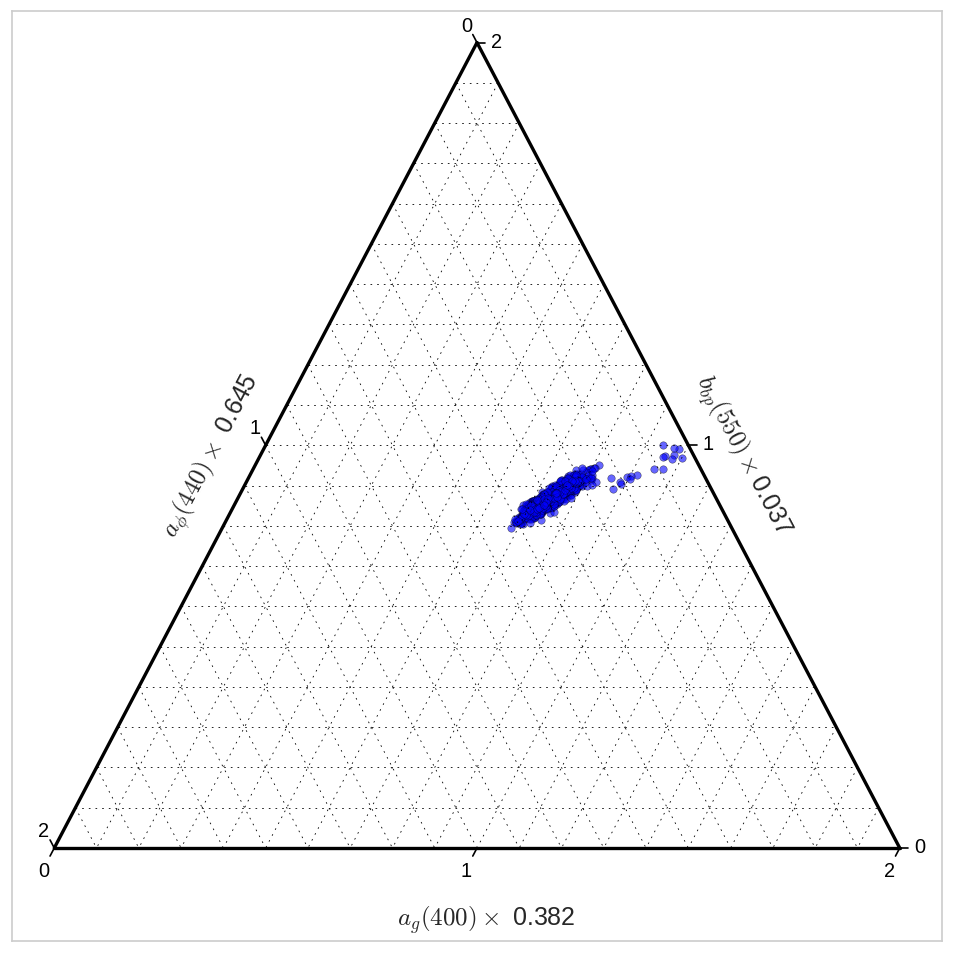

[[  2.59865834e-03   2.27064895e-03   2.38407370e-03 ...,   1.57246383e-04
    1.61625406e-04   1.44571969e-04]
 [  1.66034148e-03   1.46794624e-03   1.57232897e-03 ...,   4.92997052e-05
    4.83197439e-05   4.09990750e-05]
 [  2.23864061e-03   1.98088137e-03   2.15026714e-03 ...,   1.16328268e-04
    1.15356982e-04   1.02824502e-04]
 ..., 
 [  1.92547965e-03   1.68224895e-03   1.78750906e-03 ...,   8.66923421e-05
    8.47114715e-05   7.16297321e-05]
 [  2.94843772e-03   2.55553586e-03   2.66075115e-03 ...,   2.02071162e-04
    2.04820799e-04   1.88890268e-04]
 [  2.07954815e-03   1.81837922e-03   1.96095393e-03 ...,   9.71668847e-05
    9.21511990e-05   8.24450460e-05]]
BLA


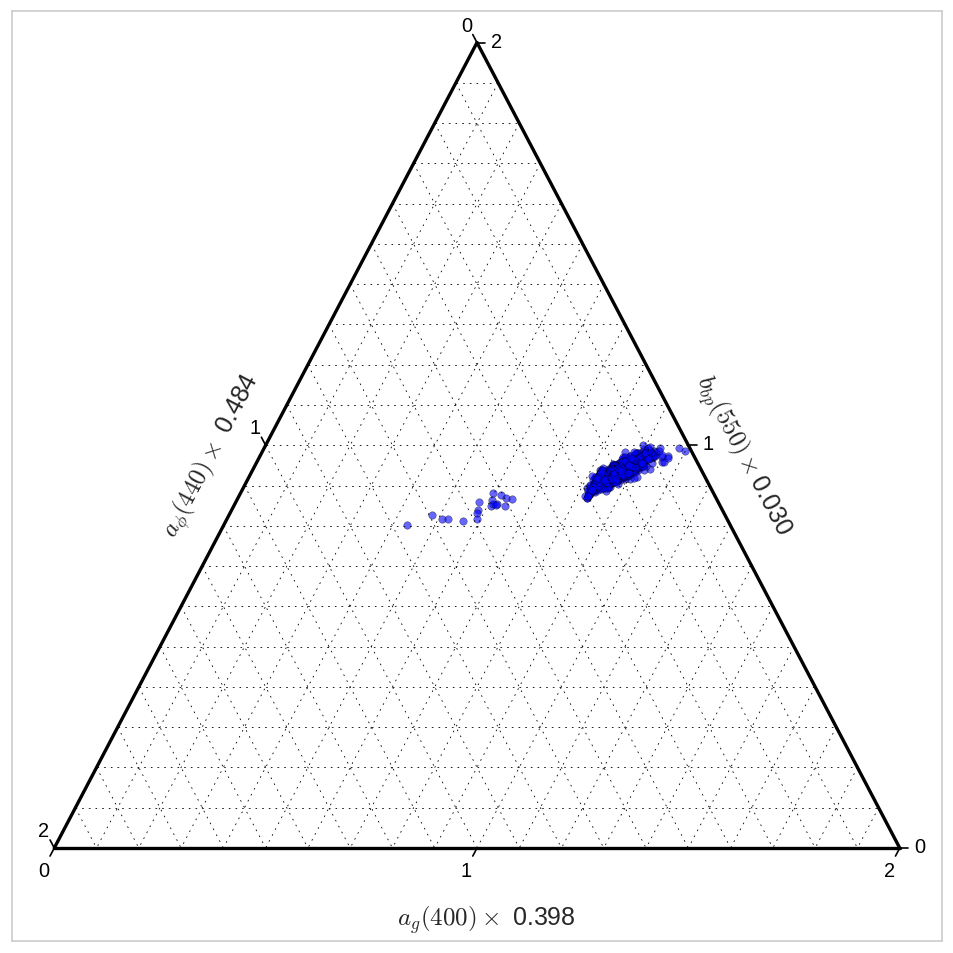

[[ 0.00243892  0.00220079  0.00229892 ...,  0.0004081   0.0003722
   0.00028551]
 [ 0.00177902  0.00158929  0.00168587 ...,  0.00020491  0.00019562
   0.00018184]
 [ 0.00266986  0.00242691  0.00256642 ...,  0.00044535  0.0004114
   0.00031196]
 ..., 
 [ 0.00385249  0.00360925  0.00377309 ...,  0.00077315  0.00067274
   0.00047807]
 [ 0.00223614  0.00200273  0.00208997 ...,  0.00032765  0.00030577
   0.00025213]
 [ 0.0016252   0.0014353   0.00159397 ...,  0.00018251  0.00017324
   0.00016599]]
HEA


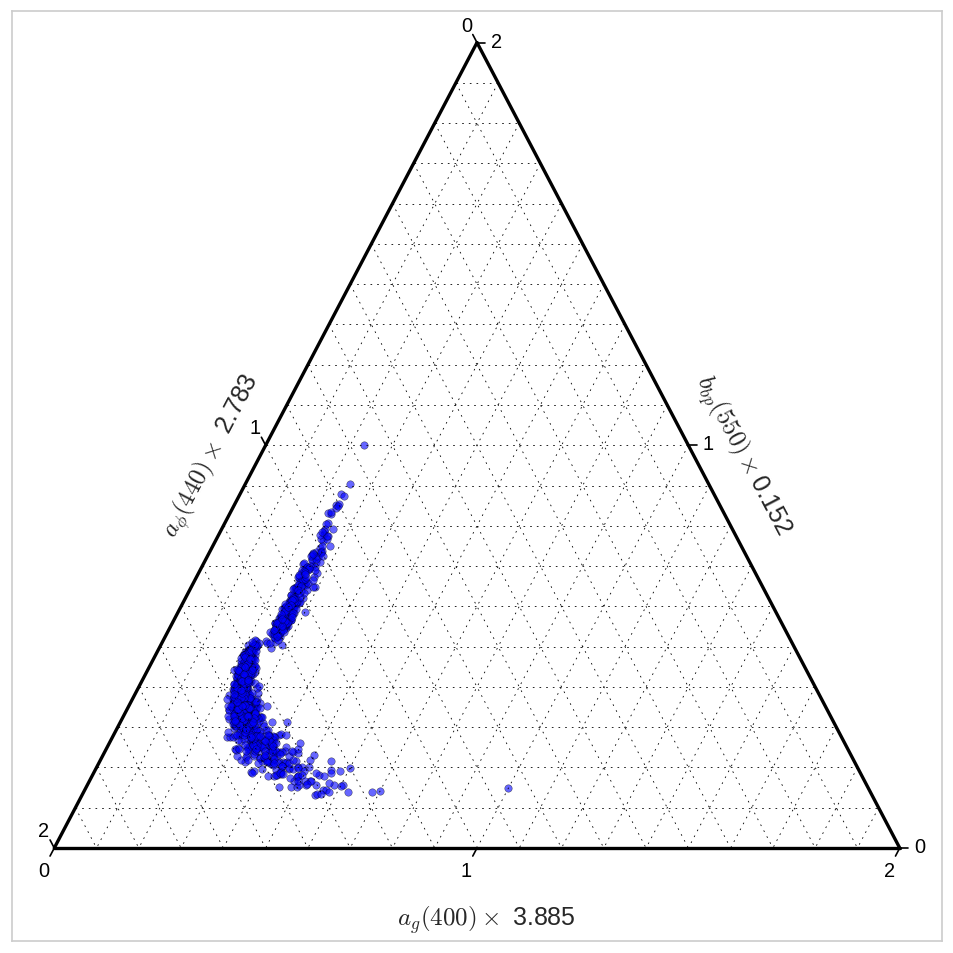

[[ 0.00209843  0.0021001   0.00185124 ...,  0.00051426  0.00051102
   0.00049695]
 [ 0.00373492  0.00371813  0.00368948 ...,  0.00058971  0.00058031
   0.0005702 ]
 [ 0.0025798   0.00243604  0.00266844 ...,  0.00055635  0.00053339
   0.00052009]
 ..., 
 [ 0.00258388  0.0022176   0.00228221 ...,  0.00054899  0.00053661
   0.00051366]
 [ 0.003112    0.00333777  0.0035258  ...,  0.00057197  0.00054844
   0.00055699]
 [ 0.00246736  0.00219985  0.00198727 ...,  0.00056493  0.00054946
   0.00053379]]
KIN


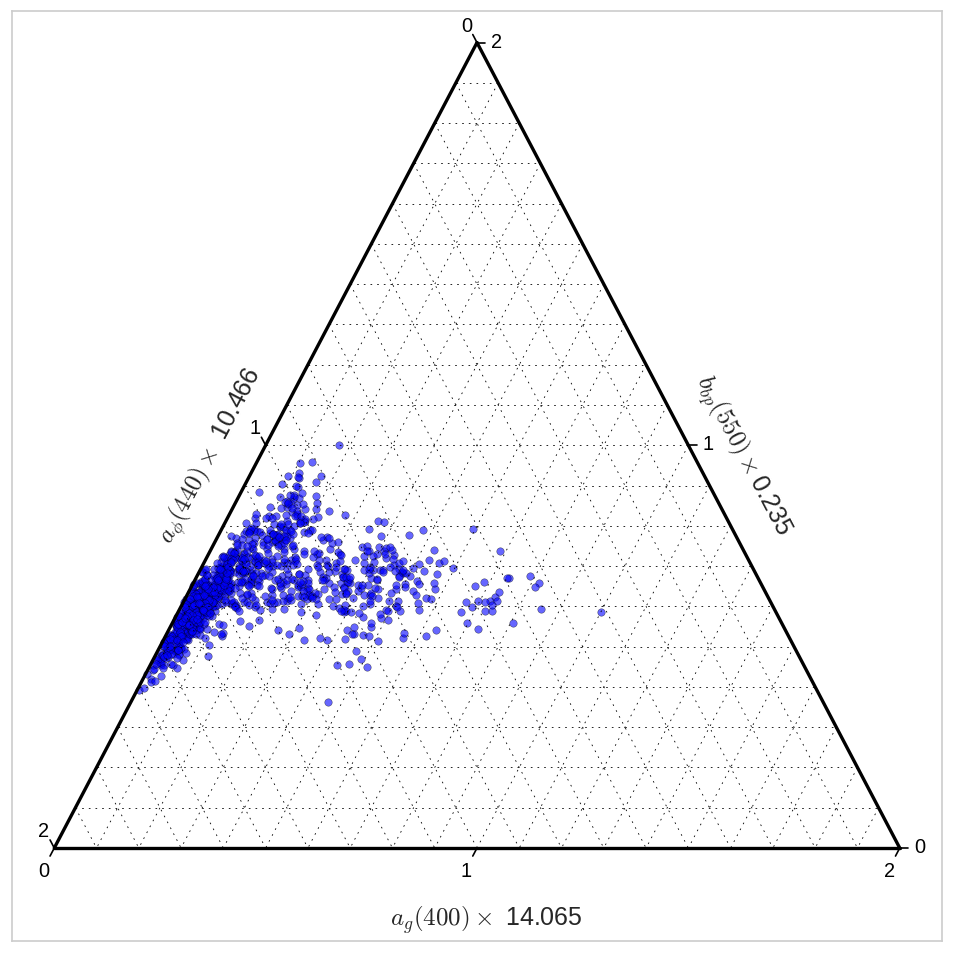

[[ 0.00078567  0.00055418  0.00068639 ...,  0.00073278  0.00069609
   0.0006349 ]
 [ 0.0008467   0.00067536  0.0008623  ...,  0.00070569  0.00067646
   0.00061031]
 [ 0.00067337  0.00038698  0.00048982 ...,  0.00068385  0.0006609
   0.00058951]
 ..., 
 [ 0.00060687  0.00037256  0.00048722 ...,  0.00067381  0.00062641
   0.00055659]
 [ 0.00054001  0.00027637  0.00039968 ...,  0.00065657  0.00063196
   0.00056755]
 [ 0.00055167  0.00038745  0.00050099 ...,  0.00064919  0.00060842
   0.00054608]]
MAY


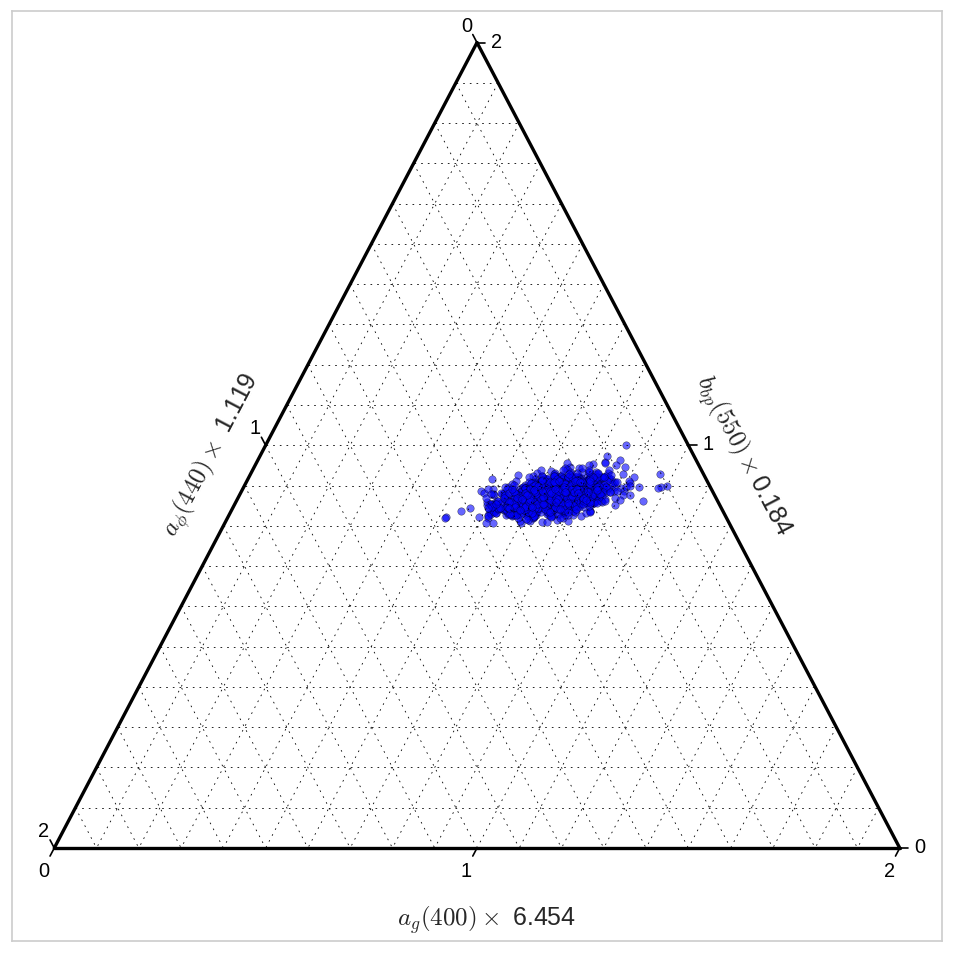

[[  2.63850266e-03   2.54082664e-03   2.66313811e-03 ...,   6.58162816e-04
    6.83090681e-04   5.79466336e-04]
 [  1.55762238e-03   1.46858605e-03   1.52918518e-03 ...,   1.73161252e-04
    1.29694968e-04   5.62955506e-05]
 [  3.17204616e-03   2.92826701e-03   3.07728184e-03 ...,   8.81772821e-04
    9.22297942e-04   8.37155158e-04]
 ..., 
 [  2.84207537e-03   2.72499083e-03   3.03718897e-03 ...,   6.72349201e-04
    6.92264321e-04   6.71294784e-04]
 [  2.63758698e-03   2.60334369e-03   2.78007162e-03 ...,   5.84047847e-04
    6.17015237e-04   5.80419243e-04]
 [  2.49935695e-03   2.45662055e-03   2.65451681e-03 ...,   5.42805331e-04
    5.51183996e-04   5.29020620e-04]]
NAR


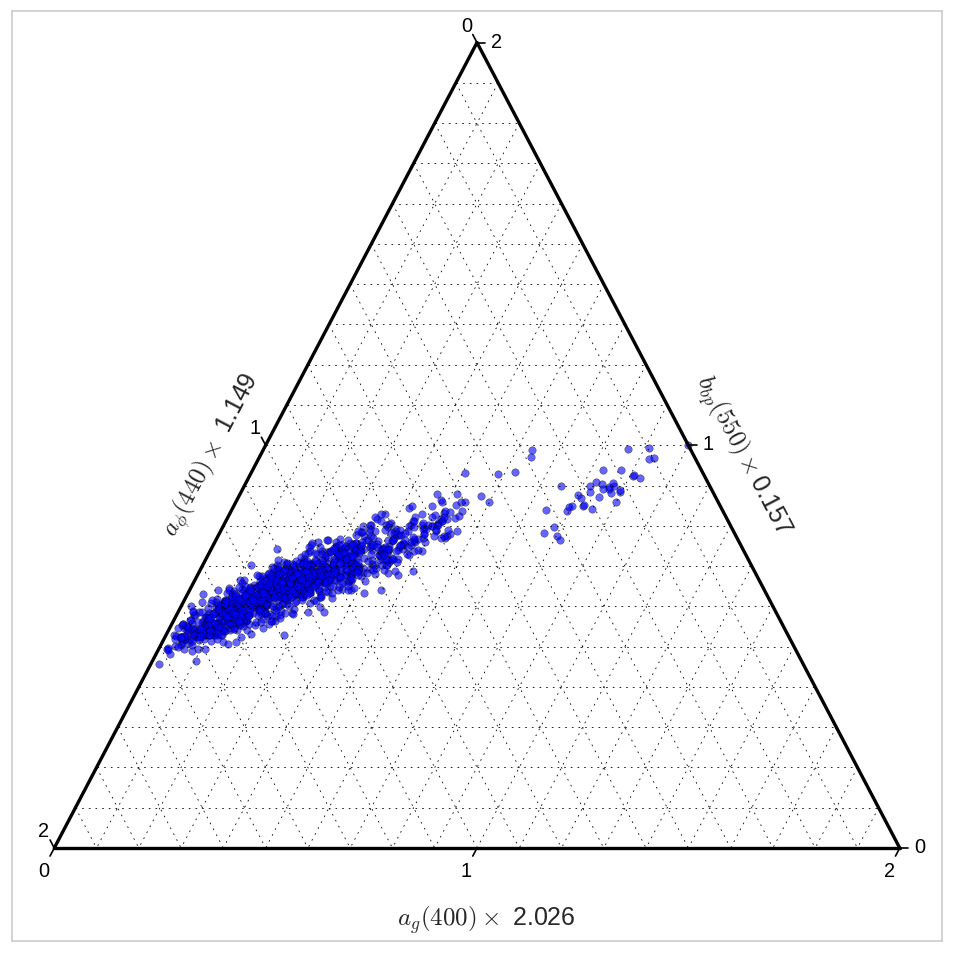

[[  1.42288332e-03   1.27880097e-03   1.48938593e-03 ...,   3.10750118e-04
    3.01765335e-04   2.61281738e-04]
 [  2.51142653e-04   1.75123421e-04   3.27995975e-04 ...,   1.77611235e-04
    1.69565016e-04   1.58101400e-04]
 [  1.54011127e-03   1.29216918e-03   1.41197755e-03 ...,   3.31737561e-04
    3.20272304e-04   2.74410568e-04]
 ..., 
 [  2.02249252e-04  -2.01322524e-05   4.27868093e-05 ...,   1.92299901e-04
    1.76352170e-04   1.54174456e-04]
 [  1.05041148e-03   9.20774070e-04   1.03531706e-03 ...,   2.74730461e-04
    2.64385703e-04   2.30821386e-04]
 [  1.20368937e-03   1.04058027e-03   1.11887151e-03 ...,   2.70780340e-04
    2.62372396e-04   2.34882795e-04]]
NIL


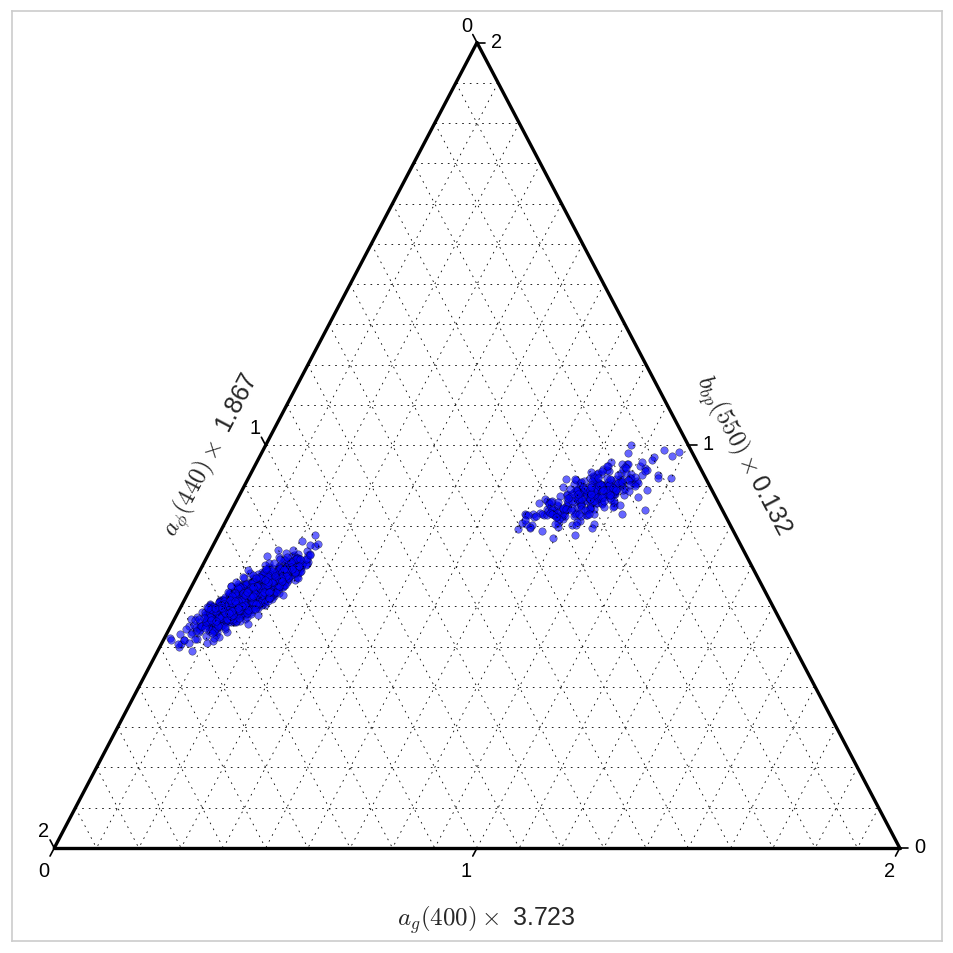

[[-0.00253345 -0.00328425 -0.00380201 ..., -0.00235926 -0.00228096
  -0.00200431]
 [-0.00535101 -0.00660457 -0.00774    ..., -0.00471977 -0.00452209
  -0.00412783]
 [ 0.00598362  0.00698359  0.00815248 ...,  0.00521227  0.00504115
   0.00453775]
 ..., 
 [ 0.00164887  0.00185581  0.0021441  ...,  0.00137924  0.00131512
   0.00118345]
 [ 0.00373127  0.00429259  0.00503318 ...,  0.00317932  0.00307994
   0.00282662]
 [ 0.00426082  0.00496182  0.00571137 ...,  0.00363316  0.00353947
   0.00319455]]
RON


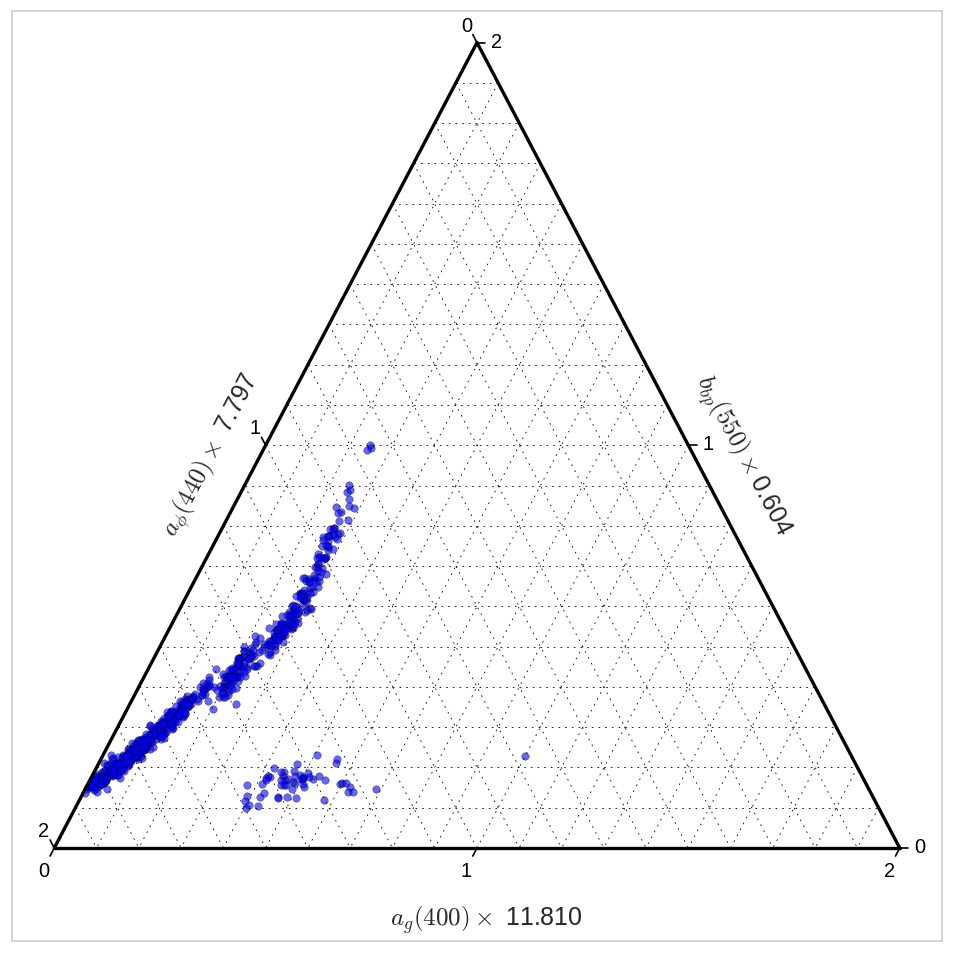

[[ 0.0009989   0.00071972  0.00077213 ...,  0.00049522  0.00047885
   0.0004446 ]
 [ 0.00056409  0.00030903  0.00052824 ...,  0.00042184  0.00040827
   0.00040017]
 [ 0.00113799  0.00087293  0.00097399 ...,  0.0005237   0.00050994
   0.00046276]
 ..., 
 [ 0.00144008  0.0011422   0.0013573  ...,  0.0005606   0.00054798
   0.00049386]
 [ 0.00099227  0.00074595  0.00084106 ...,  0.000487    0.00047603
   0.00044798]
 [ 0.00122443  0.00095134  0.00104563 ...,  0.00051602  0.00050133
   0.00046751]]
STJ


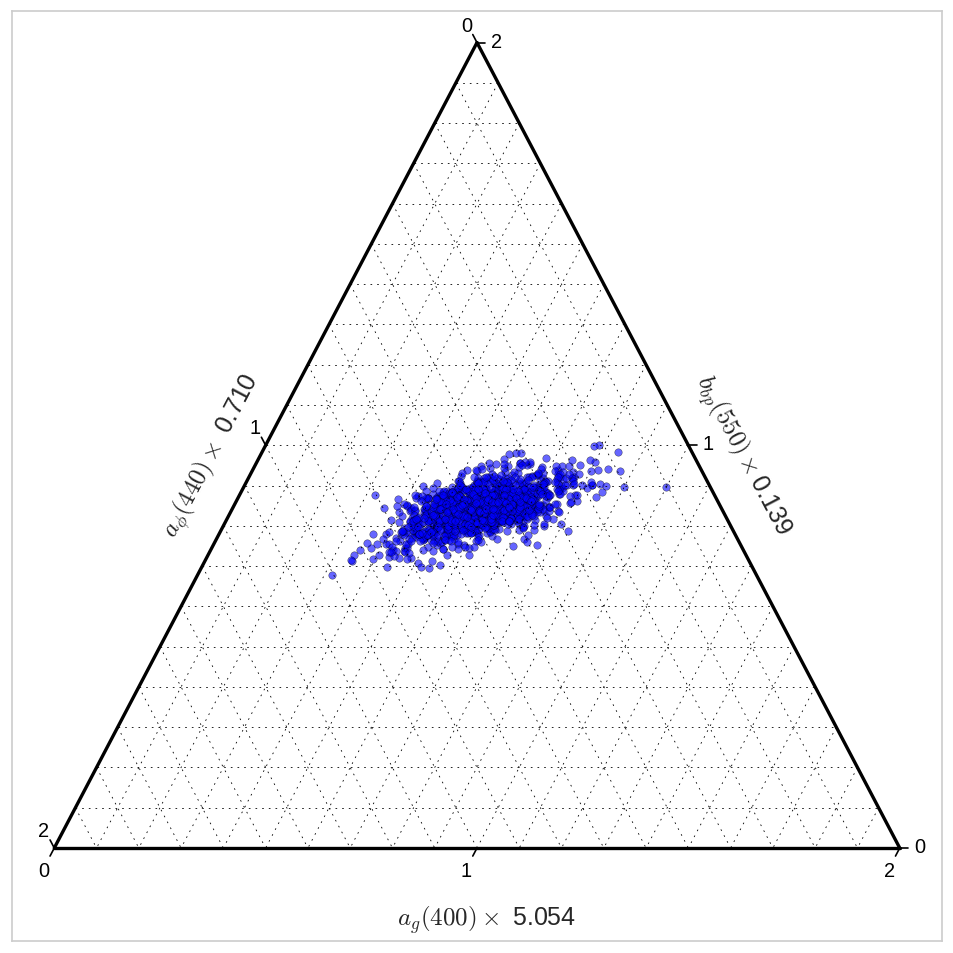

[[  1.23565734e-03   1.07700006e-03   1.13889911e-03 ...,   3.29712767e-04
    4.12090097e-04   3.57951774e-04]
 [  6.10620450e-05   6.15775806e-05   2.54608206e-04 ...,   2.23670406e-04
    2.79305742e-04   2.52247020e-04]
 [  2.16668417e-03   1.84244031e-03   2.16310554e-03 ...,   4.74703202e-04
    5.29557580e-04   5.07439700e-04]
 ..., 
 [  1.97002223e-03   1.92447828e-03   1.91074732e-03 ...,   5.27965780e-04
    5.19033154e-04   4.95170356e-04]
 [  2.45620031e-03   2.25008620e-03   2.18958268e-03 ...,   5.52718556e-04
    5.40754907e-04   5.43169888e-04]
 [  1.70706188e-03   1.28624726e-03   1.29278061e-03 ...,   4.61352985e-04
    4.85686902e-04   4.71257368e-04]]
SUC


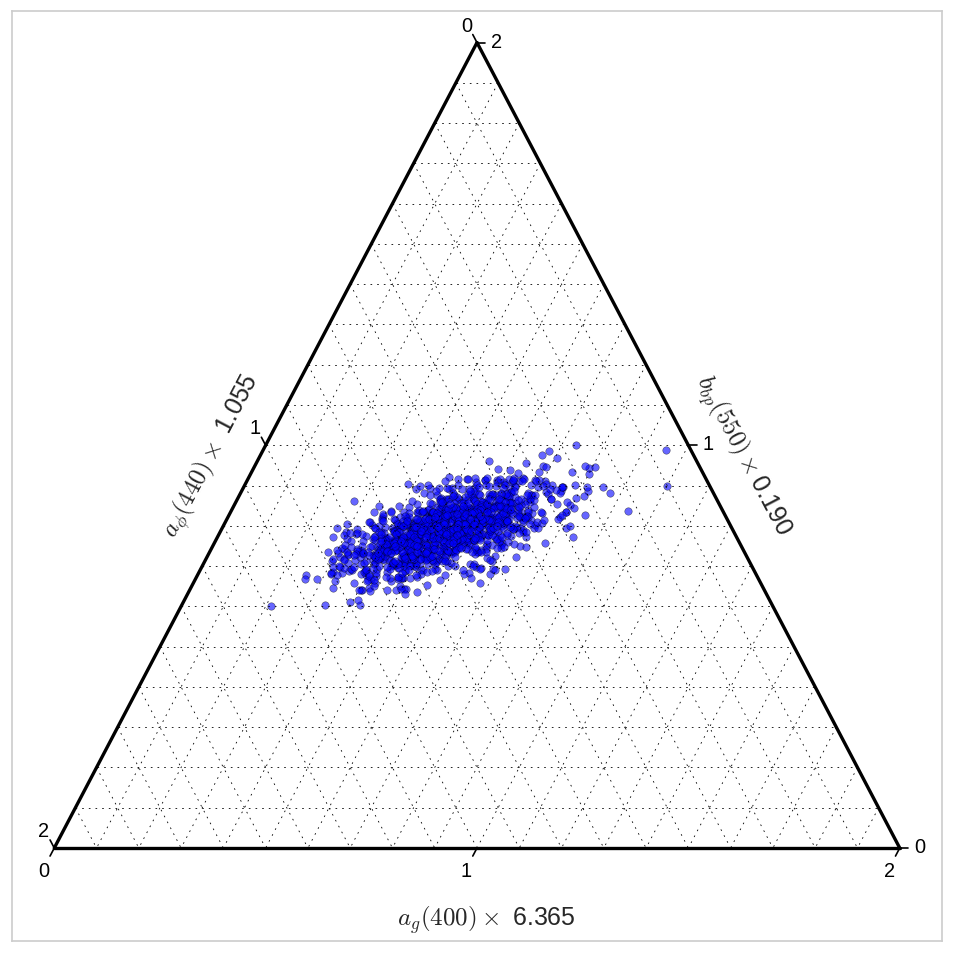

In [108]:
import ternary



#p1 = (12,8,10)


def random_points(num_points=25, scale=30):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points



import math

def shannon_entropy(p):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    s = 0.
    for i in range(len(p)):
        try:
            s += p[i] * math.log(p[i])
        except ValueError:
            continue
    return -1. * s


for sitename in sitelist:

    # open the data file and invert the data
    dc = HopeDeep(wavelengths);
    dc.rrs = np.genfromtxt("./inputs/rrs_files/" + sitename + "synthRrs.csv", delimiter=',')
    #dc.rrs = np.genfromtxt("./inputs/swan_data/0_" + sitename + "_14Nov11_1212.csv", delimiter=',')
    dc.read_all_iops_from_files();

    synth_data = dc.run(num_iters=1);

    ###interact(__plot_inverted,rrs_num=(1, len(synth_data)))

    a = []
    b = []
    c = []

    print(sitename)

    for i_iter in range(0, len(synth_data)):
        a.append(synth_data[i_iter].x[0]) #phi)
        b.append(synth_data[i_iter].x[1]) #bbp)
        c.append(synth_data[i_iter].x[2]) #cdom

    a = np.asarray(a)
    b = np.asarray(b)
    c = np.asarray(c)
    
    # Filter out the divergent iops
    a_idx = a>0.02
    a = a[a_idx]
    b = b[a_idx]
    c = c[a_idx]
    
    b_idx = b>0.02
    a = a[b_idx]
    b = b[b_idx]
    c = c[b_idx]
    
    c_idx = c>0.02
    a = a[c_idx]
    b = b[c_idx]
    c = c[c_idx]
    
    ## Boundary and Gridlines
    scale = 2
    figure, tax = ternary.figure(scale=scale)
    figure.set_size_inches(10, 10)
    figure.set_dpi(600)

    # Draw Boundary and Gridlines
    tax.boundary(linewidth=2.0)
    #tax.gridlines(color="black", multiple=0.1)
    tax.gridlines(color="black", multiple=0.1, linewidth=0.5)

    # Set Axis labels and Title
    fontsize = 15
    #tax.set_title("Simplex Boundary and Gridlines", fontsize=fontsize)
    max_a = float(max(a))
    max_b = float(max(b))
    max_c = float(max(c))
    
    la_string = r"$a_\phi(440) \times $ {0:.3f}".format(max_a)
    ra_string = r"$b_{bp}(550) \times $" + "{0:.3f}".format(max_b)
    ba_string= r"$a_g(400) \times $ {0:.3f}".format(max_c)
    
    tax.left_axis_label(la_string, fontsize=fontsize)
    tax.right_axis_label(ra_string, fontsize=fontsize)
    tax.bottom_axis_label(ba_string, fontsize=fontsize)

    # Set ticks
    tax.ticks(axis='lbr', linewidth=1)

    # Remove default Matplotlib Axes
    tax.clear_matplotlib_ticks()

    points = []

    for items in range(0, a.shape[0]):
        points.append((a[items] / np.max(a), b[items] / np.max(b), c[items] / np.max(c)))
        #points.append((a[items] / median(a), b[items] / median(b), c[items] / median(c)))

    #points = np.asarray([(a,b,c)])
    #p = shannon_entropy(points)


    tax.scatter(points, alpha=0.6)
    tax.show()
    #tax.heatmapf([(a,b,c)])
    #tax.line(p1, p2, linewidth=3., marker='s', color='green', linestyle=":")
    #print(points[0:10])



